In [1]:
# %matplotlib notebook
%matplotlib inline

# %connect_info

import jzap.misc
text = """
Jupyter connect hash:
{word}

To get matching file:
    $> python -c "import jzap.misc; print(jzap.misc.notebook_file('{word}', '/home/jeff/.local/share/jupyter/runtime'))"
To connect to existing notebook:
    $> jupyter console --existing FILE
    
"""
print(text.format(word=jzap.misc.notebook_word()))
print("Last run: {}".format(jzap.misc.timestamp()))


Jupyter connect hash:
most

To get matching file:
    $> python -c "import jzap.misc; print(jzap.misc.notebook_file('most', '/home/jeff/.local/share/jupyter/runtime'))"
To connect to existing notebook:
    $> jupyter console --existing FILE
    

Last run: 2018-05-19-00h58m08s


In [2]:
import jzap
import replay

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy.stats
from statsmodels.formula.api import ols, mixedlm
from statsmodels.stats.anova import anova_lm
import patsy
import statsmodels.api as sm

from pdb import set_trace

import warnings
warnings.filterwarnings('ignore')

# path = '/lab/data/behavior_replay_180316.txt'
path = '/lab/data/behavior_replay_180518.txt'

data = jzap.misc.load_table(path)
print(data.columns)
print(data.head())

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Index([u'mouse', u'date', u'day_sum_eqdist_0_1_plus',
       u'day_frac_eqdist_0_1_plus', u'day_sum_eqdist_0_1_minus',
       u'day_frac_eqdist_0_1_minus', u'dprime', u'hmm_dprime',
       u'hmm_dprime_noneutral', u'hmm_dprime_run2', u'hmm_dprime_run3',
       u'hmm_dprime_run4', u'hmm_engagement', u'training_licks',
       u'lick_latency', u'running', u'replay_freq_0_1_plus',
       u'replay_freq_0_1_neutral', u'replay_freq_0_1_minus', u'n_stimuli_plus',
       u'n_stimuli_neutral', u'n_stimuli_minus', u'n_ensure', u'ncorrect_plus',
       u'ncorrect_minus', u'ncorrect_neutral', u'nfalse_plus', u'nfalse_minus',
       u'nfalse_neutral', u'hmm_ncorrect_plus', u'hmm_ncorrect_minus',
       u'hmm_ncorrect_neutral', u'hmm_nfalse_plus', u'hmm_nfalse_minus',
       u'hmm_nfalse_neutral', u'hmm_nfalse_all', u'hmm_ncorrect_all',
       u'fraction_visually_driven_50_plus',
       u'fraction_visually_driven_50_minus',
       u'fraction_visually_driven_50_neutral',
       u'fraction_visually_dri

In [3]:
import replay.lib.settings

colors = replay.lib.settings.colors()

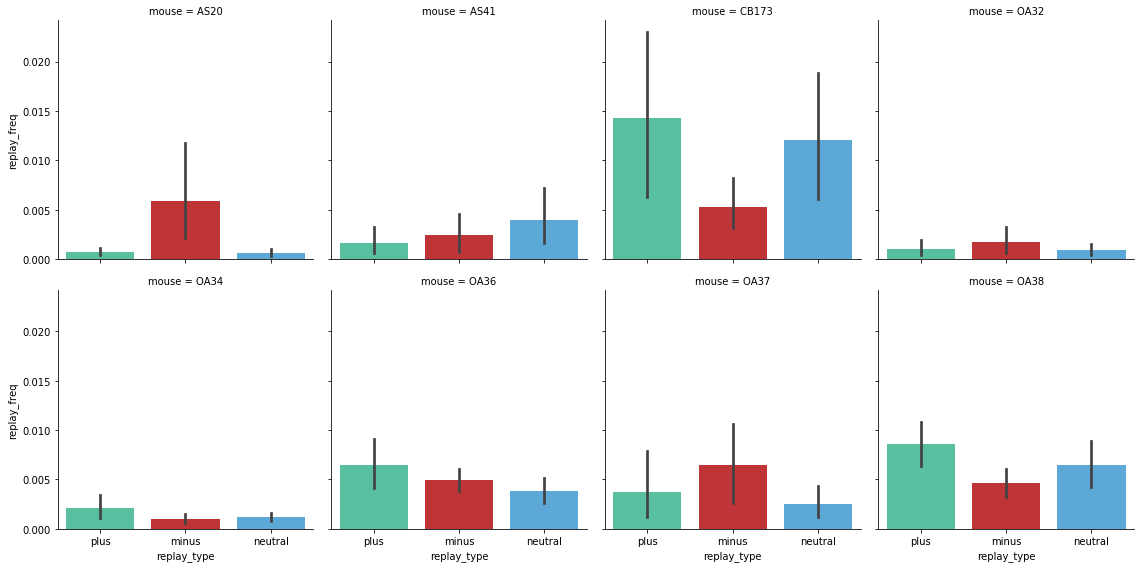

In [4]:
data_long = data[
    ['replay_freq_0_1_plus', 'replay_freq_0_1_minus',
     'replay_freq_0_1_neutral', 'mouse']]
data_long = data_long.melt(
    value_vars=['replay_freq_0_1_plus',
                'replay_freq_0_1_minus', 'replay_freq_0_1_neutral'],
    id_vars=['mouse'],
    var_name='replay_type', value_name='replay_freq')
data_long.replay_type = data_long.replay_type.map(
    {'replay_freq_0_1_plus': 'plus', 'replay_freq_0_1_minus': 'minus',
     'replay_freq_0_1_neutral': 'neutral'})

sns.factorplot(y='replay_freq', x='replay_type', col='mouse', col_wrap=4, data=data_long, kind='bar', palette=colors)

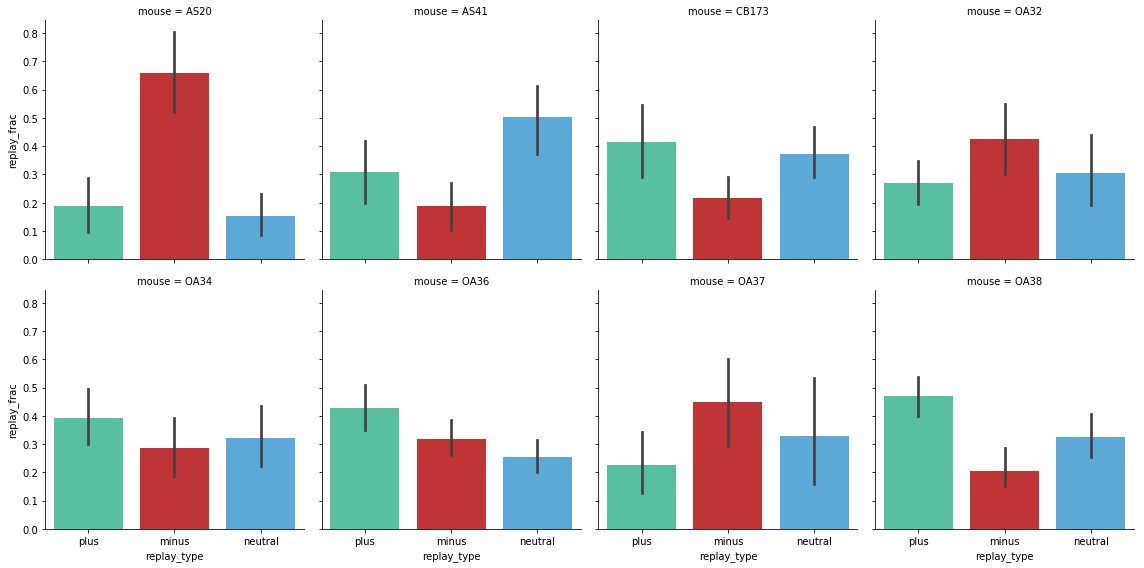

In [5]:
data_long = data[
    ['replay_freq_0_1_plus', 'replay_freq_0_1_minus',
     'replay_freq_0_1_neutral', 'replay_freq_0_1_all', 'mouse']]
data_long['replay_frac_0_1_plus'] = data_long['replay_freq_0_1_plus'] / data_long['replay_freq_0_1_all']
data_long['replay_frac_0_1_minus'] = data_long['replay_freq_0_1_minus'] / data_long['replay_freq_0_1_all']
data_long['replay_frac_0_1_neutral'] = data_long['replay_freq_0_1_neutral'] / data_long['replay_freq_0_1_all']
data_long = data_long.melt(
    value_vars=['replay_frac_0_1_plus',
                'replay_frac_0_1_minus', 'replay_frac_0_1_neutral'],
    id_vars=['mouse'],
    var_name='replay_type', value_name='replay_frac')
data_long.replay_type = data_long.replay_type.map(
    {'replay_frac_0_1_plus': 'plus', 'replay_frac_0_1_minus': 'minus',
     'replay_frac_0_1_neutral': 'neutral'})

sns.factorplot(y='replay_frac', x='replay_type', col='mouse', col_wrap=4, data=data_long, kind='bar', palette=colors)

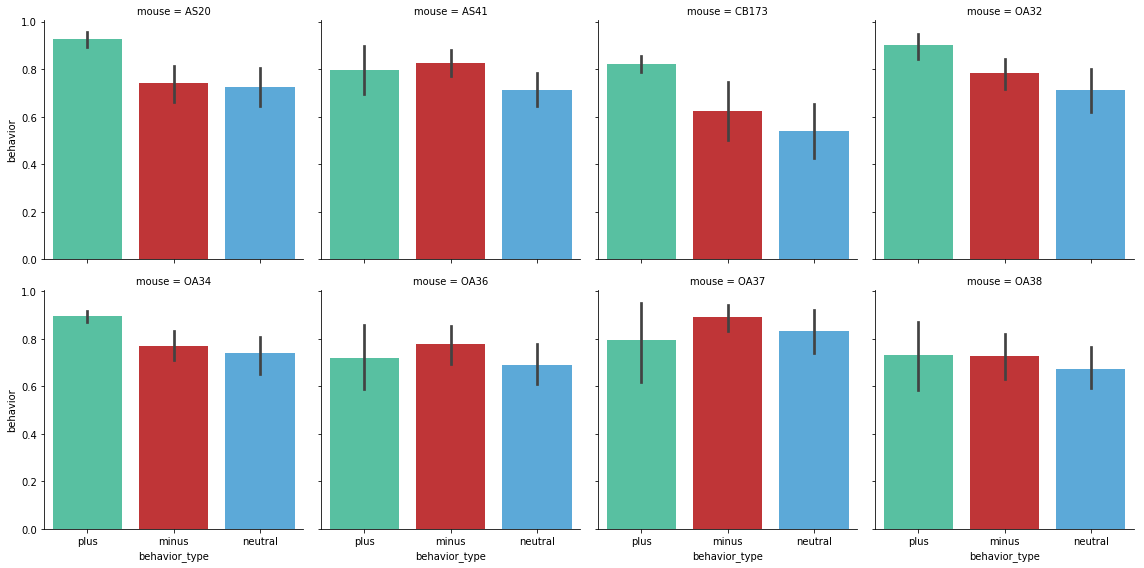

In [6]:
data_long = data[
    ['hmm_behavior_plus', 'hmm_behavior_minus',
     'hmm_behavior_neutral',  'mouse']]
data_long = data_long.melt(
    value_vars=['hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral'],
    id_vars=['mouse'],
    var_name='behavior_type', value_name='behavior')
data_long.behavior_type = data_long.behavior_type.map(
    {'hmm_behavior_plus': 'plus', 'hmm_behavior_minus': 'minus',
     'hmm_behavior_neutral': 'neutral'})

sns.factorplot(y='behavior', x='behavior_type', col='mouse', col_wrap=4, data=data_long, kind='bar', palette=colors)

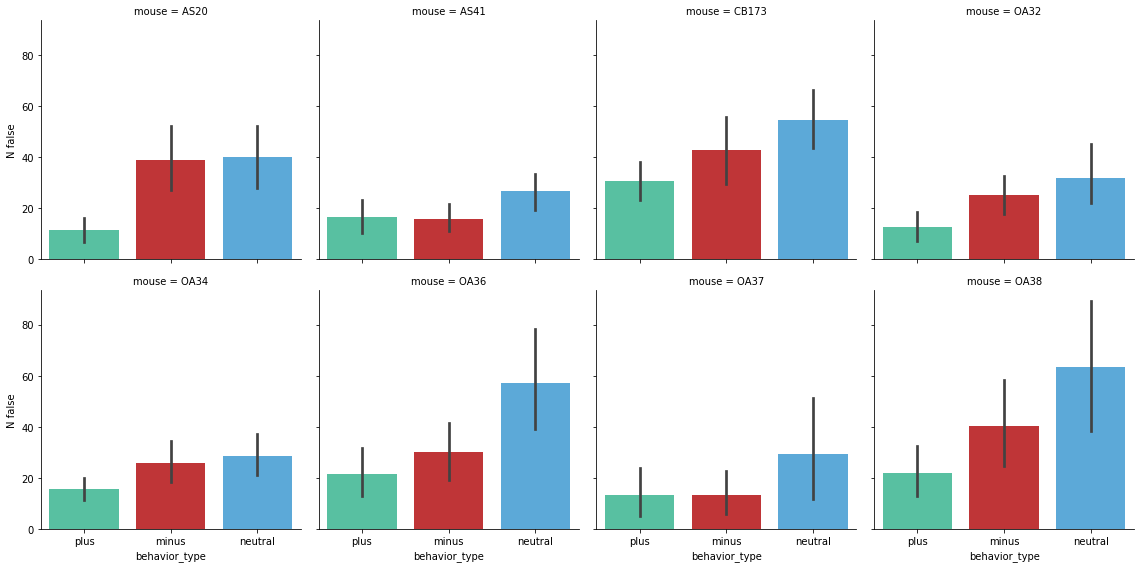

In [7]:
data_long = data[
    ['hmm_nfalse_plus', 'hmm_nfalse_minus',
     'hmm_nfalse_neutral',  'mouse']]
data_long = data_long.melt(
    value_vars=['hmm_nfalse_plus', 'hmm_nfalse_minus', 'hmm_nfalse_neutral'],
    id_vars=['mouse'],
    var_name='behavior_type', value_name='N false')
data_long.behavior_type = data_long.behavior_type.map(
    {'hmm_nfalse_plus': 'plus', 'hmm_nfalse_minus': 'minus',
     'hmm_nfalse_neutral': 'neutral'})

sns.factorplot(y='N false', x='behavior_type', col='mouse', col_wrap=4, data=data_long, kind='bar', palette=colors)

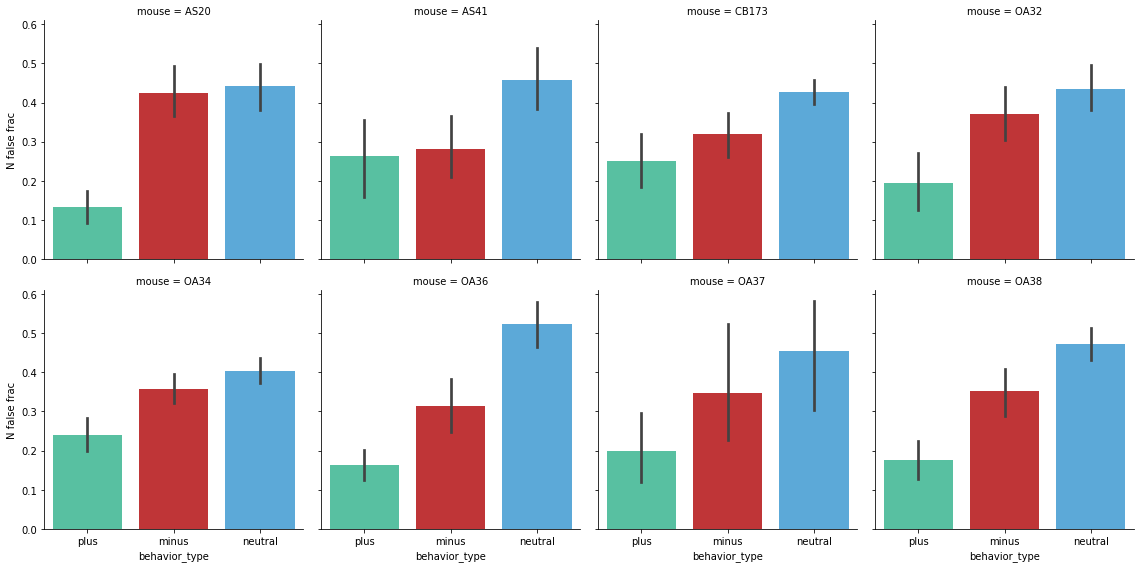

In [8]:
data_long = data[
    ['hmm_nfalse_plus', 'hmm_nfalse_minus',
     'hmm_nfalse_neutral',  'hmm_nfalse_all', 'mouse']]
data_long['hmm_nfalse_frac_plus'] = data_long['hmm_nfalse_plus'] / data_long['hmm_nfalse_all']
data_long['hmm_nfalse_frac_minus'] = data_long['hmm_nfalse_minus'] / data_long['hmm_nfalse_all']
data_long['hmm_nfalse_frac_neutral'] = data_long['hmm_nfalse_neutral'] / data_long['hmm_nfalse_all']
data_long = data_long.melt(
    value_vars=['hmm_nfalse_frac_plus', 'hmm_nfalse_frac_minus', 'hmm_nfalse_frac_neutral'],
    id_vars=['mouse'],
    var_name='behavior_type', value_name='N false frac')
data_long.behavior_type = data_long.behavior_type.map(
    {'hmm_nfalse_frac_plus': 'plus', 'hmm_nfalse_frac_minus': 'minus',
     'hmm_nfalse_frac_neutral': 'neutral'})

sns.factorplot(y='N false frac', x='behavior_type', col='mouse', col_wrap=4, data=data_long, kind='bar', palette=colors)

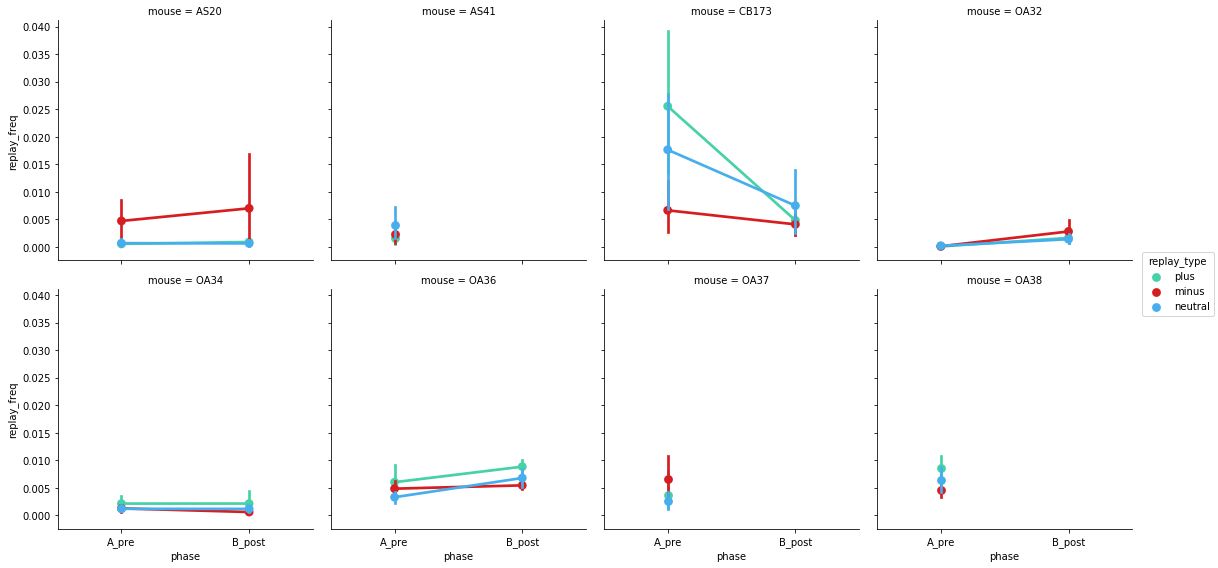

In [9]:
data_long = data[
    ['replay_freq_0_1_plus', 'replay_freq_0_1_minus',
     'replay_freq_0_1_neutral', 'replay_freq_0_1_all', 'mouse', 'phase']]
data_long = data_long.melt(
    value_vars=['replay_freq_0_1_plus',
                'replay_freq_0_1_minus', 'replay_freq_0_1_neutral'],
    id_vars=['mouse', 'phase'],
    var_name='replay_type', value_name='replay_freq')
data_long.replay_type = data_long.replay_type.map(
    {'replay_freq_0_1_plus': 'plus', 'replay_freq_0_1_minus': 'minus',
     'replay_freq_0_1_neutral': 'neutral'})

sns.factorplot(y='replay_freq', x='phase', hue='replay_type', col='mouse', col_wrap=4, data=data_long, kind='point', palette=colors)

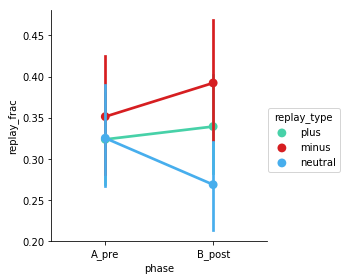

In [10]:
data_long = data[
    ['replay_freq_0_1_plus', 'replay_freq_0_1_minus',
     'replay_freq_0_1_neutral', 'replay_freq_0_1_all', 'mouse', 'phase']]
data_long['replay_frac_0_1_plus'] = data_long['replay_freq_0_1_plus'] / data_long['replay_freq_0_1_all']
data_long['replay_frac_0_1_minus'] = data_long['replay_freq_0_1_minus'] / data_long['replay_freq_0_1_all']
data_long['replay_frac_0_1_neutral'] = data_long['replay_freq_0_1_neutral'] / data_long['replay_freq_0_1_all']
data_long = data_long.melt(
    value_vars=['replay_frac_0_1_plus',
                'replay_frac_0_1_minus', 'replay_frac_0_1_neutral'],
    id_vars=['mouse', 'phase'],
    var_name='replay_type', value_name='replay_frac')
data_long.replay_type = data_long.replay_type.map(
    {'replay_frac_0_1_plus': 'plus', 'replay_frac_0_1_minus': 'minus',
     'replay_frac_0_1_neutral': 'neutral'})

sns.factorplot(y='replay_frac', x='phase', hue='replay_type', data=data_long, kind='point', palette=colors)

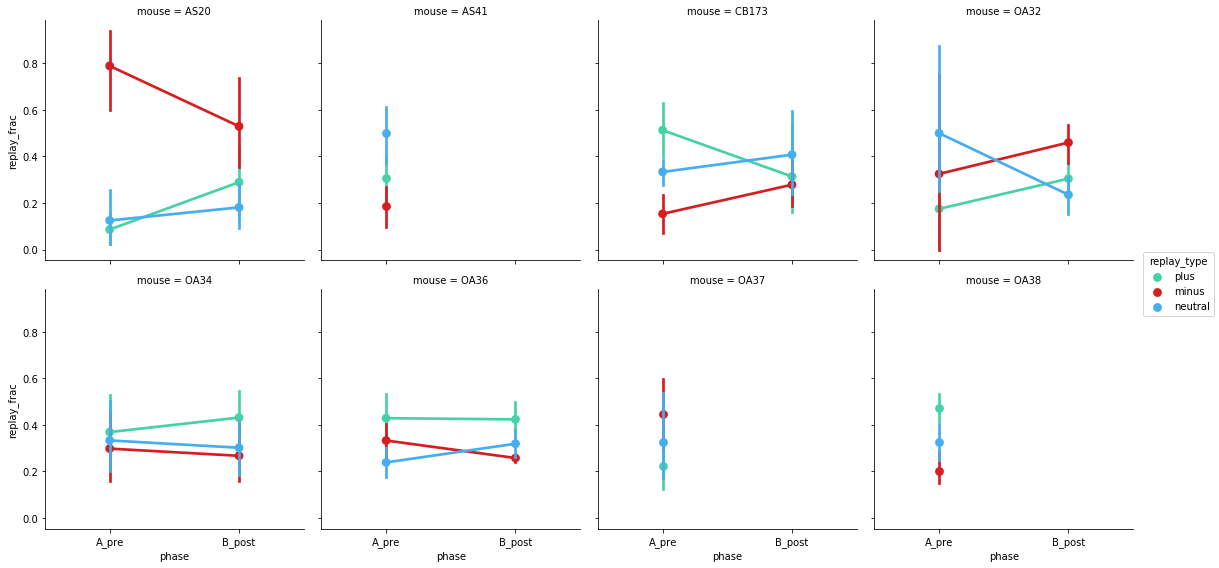

In [11]:
data_long = data[
    ['replay_freq_0_1_plus', 'replay_freq_0_1_minus',
     'replay_freq_0_1_neutral', 'replay_freq_0_1_all', 'mouse', 'phase']]
data_long['replay_frac_0_1_plus'] = data_long['replay_freq_0_1_plus'] / data_long['replay_freq_0_1_all']
data_long['replay_frac_0_1_minus'] = data_long['replay_freq_0_1_minus'] / data_long['replay_freq_0_1_all']
data_long['replay_frac_0_1_neutral'] = data_long['replay_freq_0_1_neutral'] / data_long['replay_freq_0_1_all']
data_long = data_long.melt(
    value_vars=['replay_frac_0_1_plus',
                'replay_frac_0_1_minus', 'replay_frac_0_1_neutral'],
    id_vars=['mouse', 'phase'],
    var_name='replay_type', value_name='replay_frac')
data_long.replay_type = data_long.replay_type.map(
    {'replay_frac_0_1_plus': 'plus', 'replay_frac_0_1_minus': 'minus',
     'replay_frac_0_1_neutral': 'neutral'})

sns.factorplot(y='replay_frac', x='phase', hue='replay_type', col='mouse', col_wrap=4, data=data_long, kind='point', palette=colors)

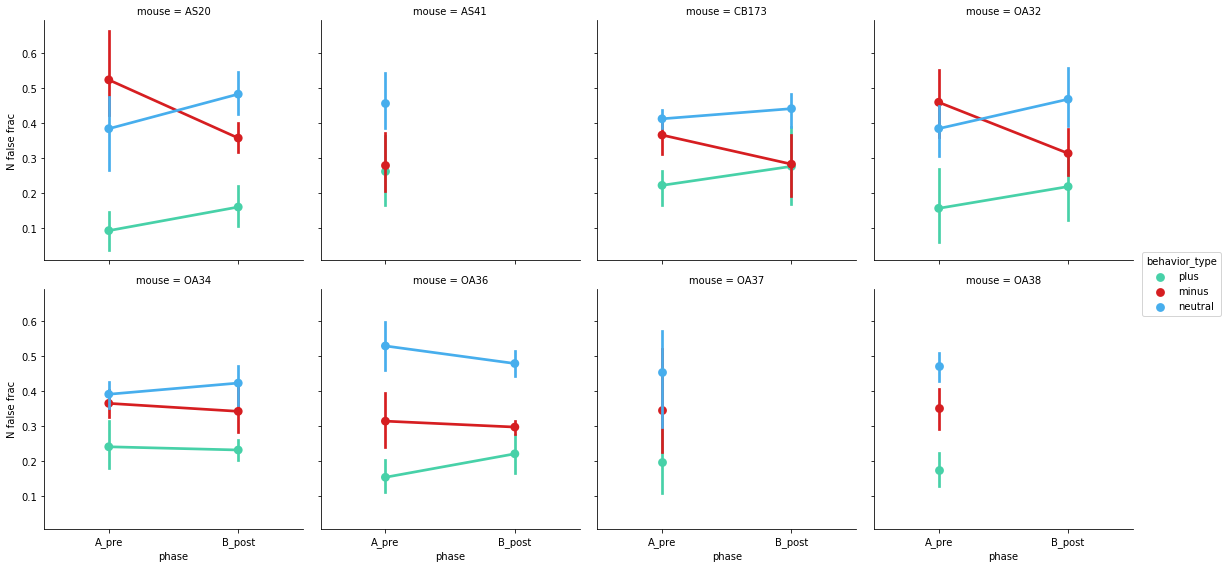

In [12]:
data_long = data[
    ['hmm_nfalse_plus', 'hmm_nfalse_minus',
     'hmm_nfalse_neutral',  'hmm_nfalse_all', 'mouse', 'phase']]
data_long['hmm_nfalse_frac_plus'] = data_long['hmm_nfalse_plus'] / data_long['hmm_nfalse_all']
data_long['hmm_nfalse_frac_minus'] = data_long['hmm_nfalse_minus'] / data_long['hmm_nfalse_all']
data_long['hmm_nfalse_frac_neutral'] = data_long['hmm_nfalse_neutral'] / data_long['hmm_nfalse_all']
data_long = data_long.melt(
    value_vars=['hmm_nfalse_frac_plus', 'hmm_nfalse_frac_minus', 'hmm_nfalse_frac_neutral'],
    id_vars=['mouse', 'phase'],
    var_name='behavior_type', value_name='N false frac')
data_long.behavior_type = data_long.behavior_type.map(
    {'hmm_nfalse_frac_plus': 'plus', 'hmm_nfalse_frac_minus': 'minus',
     'hmm_nfalse_frac_neutral': 'neutral'})

sns.factorplot(y='N false frac', x='phase', hue='behavior_type', col='mouse', col_wrap=4, data=data_long, kind='point', palette=colors)

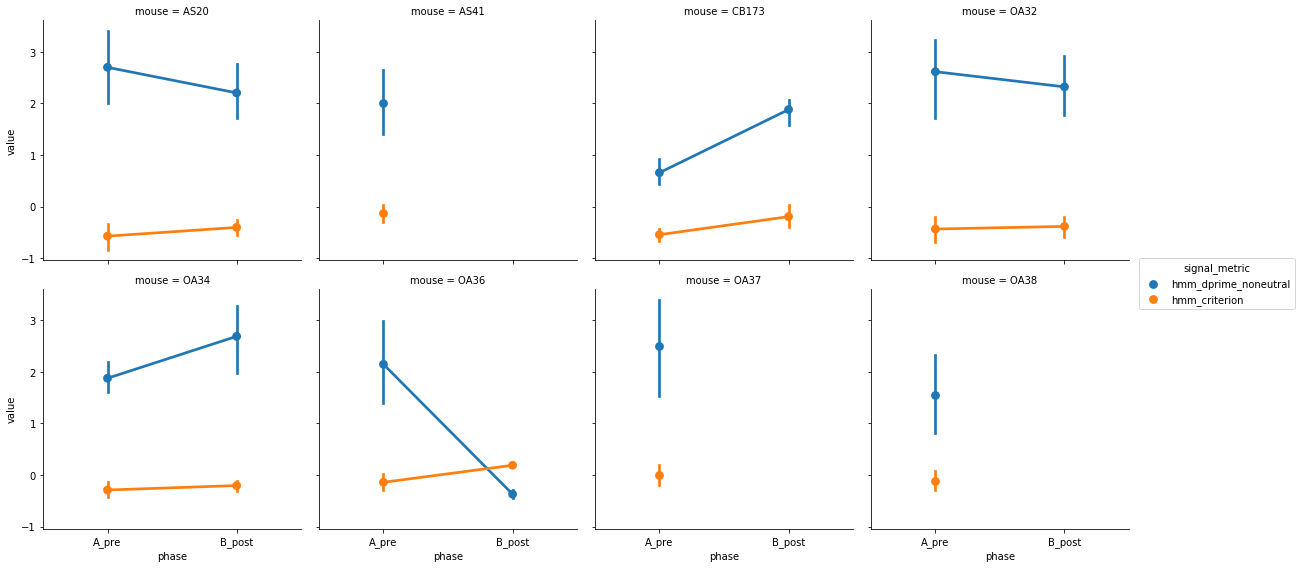

In [13]:
data_long = data[
    ['hmm_dprime_noneutral', 'hmm_criterion', 'mouse', 'phase']]
data_long = data_long.melt(
    value_vars=['hmm_dprime_noneutral', 'hmm_criterion'],
    id_vars=['mouse', 'phase'],
    var_name='signal_metric', value_name='value')

sns.factorplot(y='value', x='phase', hue='signal_metric', col='mouse', col_wrap=4, data=data_long, kind='point')

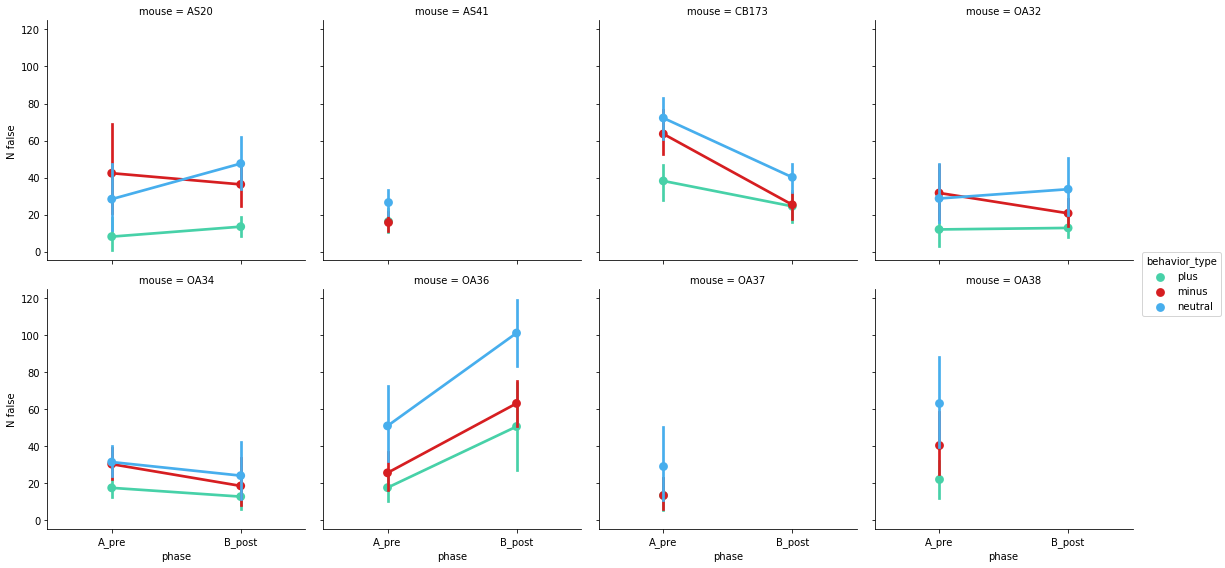

In [14]:
data_long = data[
    ['hmm_nfalse_plus', 'hmm_nfalse_minus',
     'hmm_nfalse_neutral',  'mouse', 'phase']]
data_long = data_long.melt(
    value_vars=['hmm_nfalse_plus', 'hmm_nfalse_minus', 'hmm_nfalse_neutral'],
    id_vars=['mouse', 'phase'],
    var_name='behavior_type', value_name='N false')
data_long.behavior_type = data_long.behavior_type.map(
    {'hmm_nfalse_plus': 'plus', 'hmm_nfalse_minus': 'minus',
     'hmm_nfalse_neutral': 'neutral'})

sns.factorplot(y='N false', x='phase', hue='behavior_type', col='mouse', col_wrap=4, data=data_long, kind='point', palette=colors)

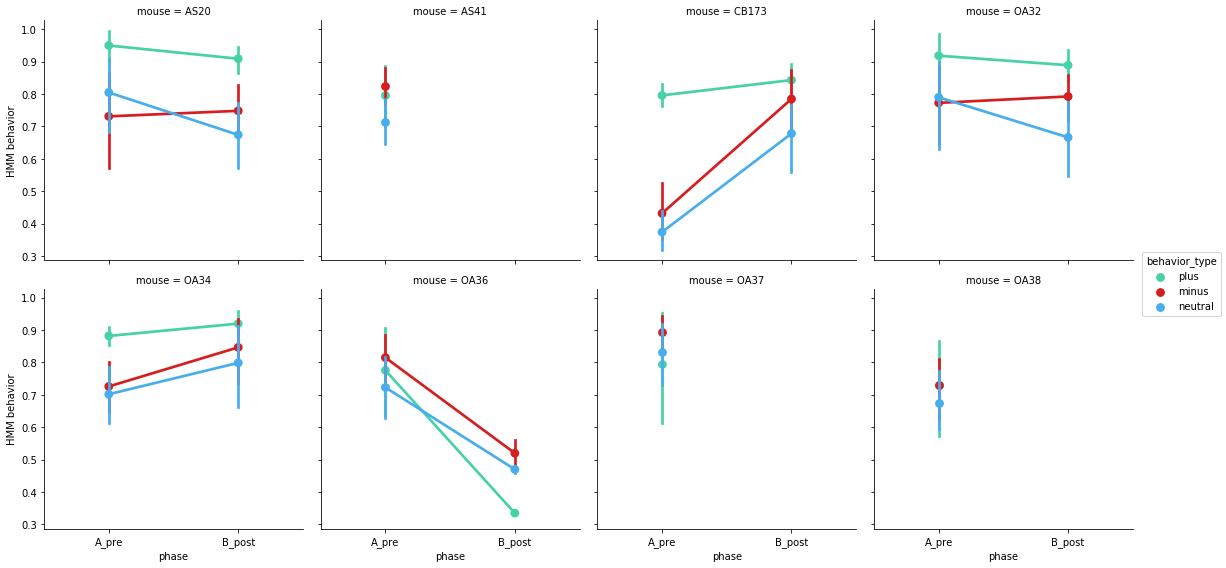

In [15]:
data_long = data[
    ['hmm_behavior_plus', 'hmm_behavior_minus',
     'hmm_behavior_neutral',  'mouse', 'phase']]
data_long = data_long.melt(
    value_vars=['hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral'],
    id_vars=['mouse', 'phase'],
    var_name='behavior_type', value_name='HMM behavior')
data_long.behavior_type = data_long.behavior_type.map(
    {'hmm_behavior_plus': 'plus', 'hmm_behavior_minus': 'minus',
     'hmm_behavior_neutral': 'neutral'})

sns.factorplot(y='HMM behavior', x='phase', hue='behavior_type', col='mouse', col_wrap=4, data=data_long, kind='point', palette=colors)